In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('startUp (1).csv') 
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<h3><b>DATA EXPLORATION<hr>

In [15]:
def plotter(dataframe, col1, col2, dep):
    plt.figure(figsize = (18,4))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 2, 1)
    sns.regplot(data = dataframe, x = col1, y = dep, ci = None)
    plt. title(f"Relationship is btw{col1} and {dep} is {(dataframe[col1].corr(dataframe[dep])).round(2)}%")

    plt.subplot(1, 2, 2)
    sns.regplot(data = dataframe, x = col2, y = dep, ci = None)
    plt.title(f"Relationship is btw {col2} and {dep} is {(dataframe[col2].corr(dataframe[dep])).round(2)}%")

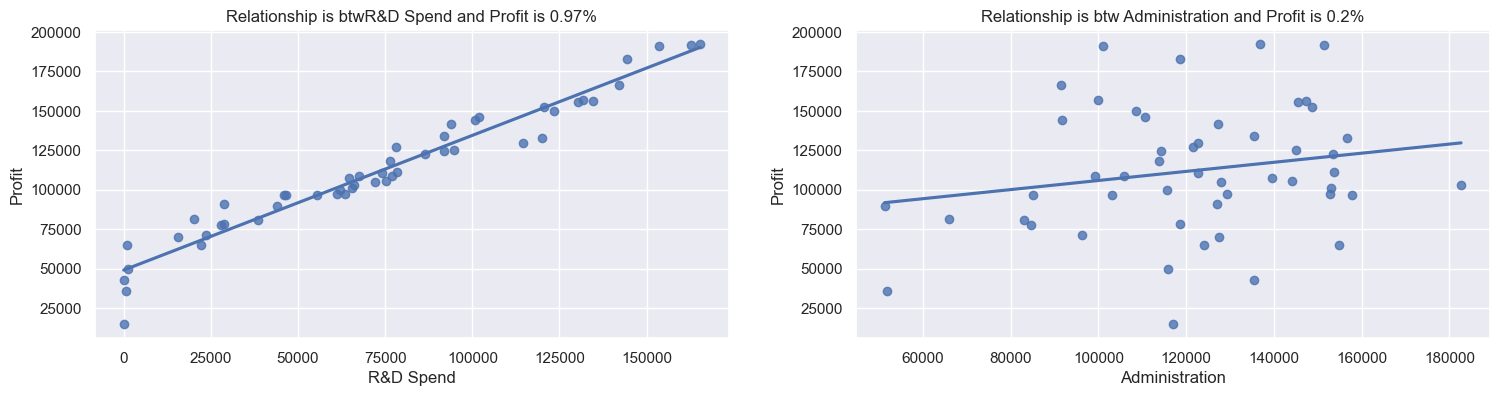

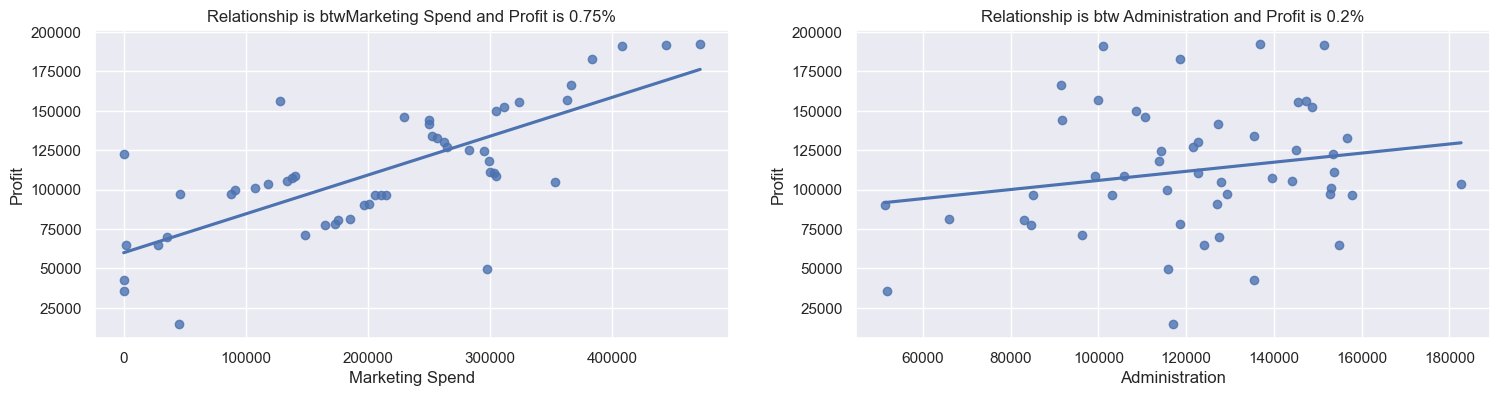

In [37]:
plotter(data, 'R&D Spend', 'Administration', 'Profit')
plotter(data, 'Marketing Spend','Administration', 'Profit')

<h3><b>FEATURE ENGINEERING<hr>

In [3]:
df = data.copy()

In [4]:
#using the describe method, we will ascertain the columns to be scaled by selecting columns with high standard deviation
cols_to_scale =[]
for i in df.select_dtypes(include = 'number').columns:
    if df[i].describe()[2]>1500:
        cols_to_scale.append(i)

cols_to_scale        

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

In [5]:
#STANDARD SCALING

from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

scaler_holder = {}

for columns in cols_to_scale[ : -1]:
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[[columns]])
    scaler_holder[columns + '_scale'] = scaler
    joblib.dump(scaler, open(f'{columns}_scaler.pkl', 'wb'))
    print(f"{columns} successfully scaled")

R&D Spend successfully scaled
Administration successfully scaled
Marketing Spend successfully scaled


In [6]:
#Encode the categorical column state
encoder = LabelEncoder()
df['State'] = encoder.fit_transform(df['State'])

joblib.dump(encoder, open('state_encoder.pkl', 'wb'))

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,2.016411,0.560753,2.153943,2,192261.83
1,1.955860,1.082807,1.923600,0,191792.06
2,1.754364,-0.728257,1.626528,1,191050.39
3,1.554784,-0.096365,1.422210,2,182901.99
4,1.504937,-1.079919,1.281528,1,166187.94


<h3><b>MODELLING<hr>

In [27]:
from sklearn.model_selection import train_test_split

x = df.drop('Profit', axis = 1)
y = df.Profit

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.15)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Linear Regression model creation
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)

#Cross Validation
cv = linreg.predict(xtrain)
print(f"Cross Validation Score is: {r2_score(cv, ytrain)}")

Cross Validation Score is: 0.9566263342621034


In [33]:
#Model Testing
test_pred = linreg.predict(xtest)
print(f"Model Test Score is: {r2_score(test_pred, ytest)}")

Model Test Score is: 0.8797738167856742


In [34]:
#Model Saving
joblib.dump(linreg, open('startUpModel.pkl', 'wb'))